# 01 EDA (MovieLens 100K)

Tikslai:
- Patikrinti duomenu struktura, trukstamas reiksmes, pasiskirstymus.
- Nuspresti filtrus (min. ivykiai vartotojui/filmui).
- Paruosti pastabas modeliui ir UI.


In [1]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

from src import data_loader, preprocess


In [4]:
# Minimum number of interactions (ratings) a user must have to be kept in the dataset
MIN_USER = 20
# Minimum number of interactions (ratings) an item (movie) must have to be kept in the dataset
MIN_ITEM = 20
LIMIT = None  

ratings = data_loader.load_ratings(limit=LIMIT)
items = data_loader.load_items()
print(ratings.head())
print("user count", ratings.user_id.nunique(), "items", ratings.item_id.nunique())

ratings_f = preprocess.filter_min_counts(
    ratings,
    min_user_interactions=MIN_USER,
    min_item_interactions=MIN_ITEM,
)
print("po filtro", len(ratings_f), "user", ratings_f.user_id.nunique(), "items", ratings_f.item_id.nunique())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
user count 943 items 1682
po filtro 94443 user 917 items 937


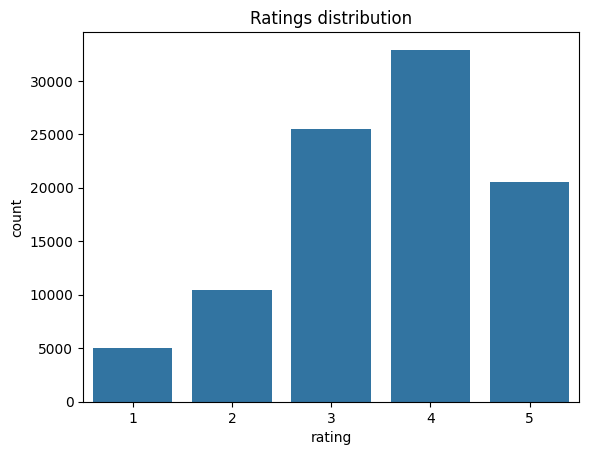

In [5]:
sns.countplot(x="rating", data=ratings_f)
plt.title("Ratings distribution")
plt.show()


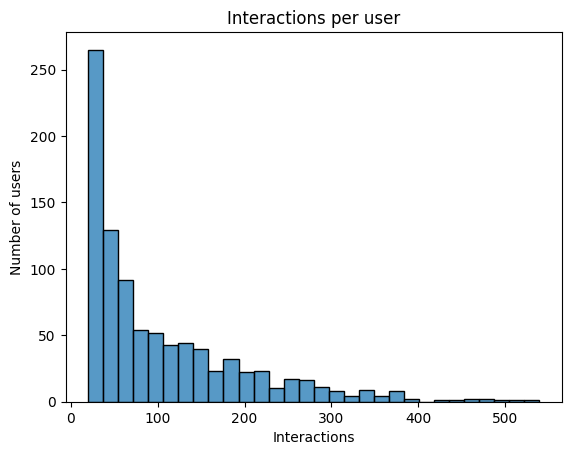

In [9]:
ratings_per_user = ratings_f.groupby("user_id").size()
sns.histplot(ratings_per_user, bins=30)
plt.title("Interactions per user")
plt.xlabel("Interactions")
plt.ylabel("Number of users")
plt.show()


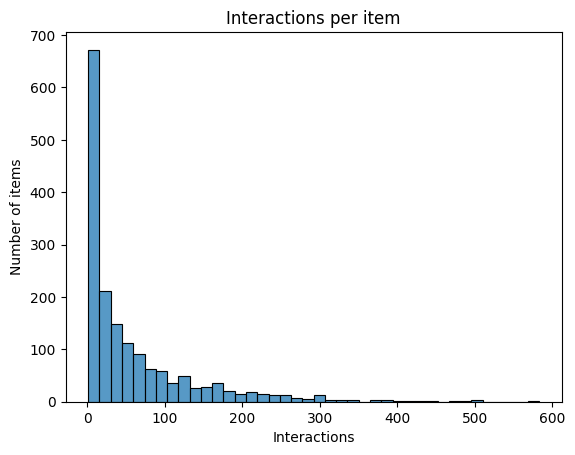

In [ ]:
# Item aktyvumas
item_counts = ratings.groupby('item_id').size()
sns.histplot(item_counts, bins=40)
plt.title('Interactions per item')
plt.xlabel('Interactions')
plt.ylabel('Number of items')
plt.show()


In [13]:
# Sparsity
n_users = ratings.user_id.nunique()
n_items = ratings.item_id.nunique()
sparsity = 1 - len(ratings)/(n_users*n_items)
print('Sparsity:', round(sparsity,4))


Sparsity: 0.937
